DMML Assignment 1

Om Ambaye BMC202006 
Alok Dhar Dubey BMP202001

In [1]:
#importing various packages
import time
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'
start = time.time()
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

from sklearn.preprocessing import OneHotEncoder

Reading Data

In [2]:
path_to_file="C:/CMI/SEM 6/DMML/Assignment1/bank-data/bank-additional-full.csv"
bank_data=pd.read_csv(path_to_file, sep=";")
bank_data


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Modifying the Dataset

In [4]:
bank_data=bank_data.drop(columns=['duration'])
bank_data=bank_data.drop(columns=['default'])
bank_data=bank_data.drop(columns=['contact'])
bank_data=bank_data.drop(columns=['day_of_week'])
bank_data=bank_data.drop(columns=['pdays'])

bank_data=bank_data.drop(columns=['poutcome'])

#Changing categorical attributes to numerical attributes using Label Encoding.
categorical_cols = ['job', 'marital','month']
bank_data = pd.get_dummies(bank_data, columns = categorical_cols, drop_first = True)
#bank_data['poutcome'] = bank_data['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
#bank_data['default'] = bank_data['default'].map({'yes': -1,'unknown': 0,'no': 1})
bank_data['housing'] = bank_data['housing'].map({'yes': -1,'unknown': 0,'no': 1})
bank_data['loan'] = bank_data['loan'].map({'yes': -1,'unknown': 0,'no': 1})
bank_data['education'] = bank_data['education'].map({'unknown':-1, 'illiterate':0, 'basic.4y':1, 'basic.6y':2, 'basic.9y':3, 'high.school':4,'professional.course':5,'university.degree':6})


X = bank_data.drop(['y'], axis = 1)
y = bank_data['y']

feature_names=X.columns
#Splitting the data into training and test samples (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.3)
y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [5]:
DT = DecisionTreeClassifier(max_depth = 3, max_leaf_nodes = 16, random_state=42, class_weight="balanced")
DT.fit(X_train, y_train)

y_pred = DT.predict(X_test)
y_test = np.array(y_test).flatten()
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.94      0.87      0.90     10968
         yes       0.36      0.59      0.44      1389

    accuracy                           0.83     12357
   macro avg       0.65      0.73      0.67     12357
weighted avg       0.88      0.83      0.85     12357



In [6]:
print("Accuracy for Decision Tree: ", np.round(sklearn.metrics.accuracy_score(y_test, y_pred)*100,2), '%')
print("Precision for Decision Tree: ", np.round(sklearn.metrics.precision_score(y_test, y_pred,pos_label='yes')*100,2), '%')
print("Recall for Decision Tree: ", np.round(sklearn.metrics.recall_score(y_test, y_pred,pos_label='yes')*100,2), '%')
print("F1 score for Decision Tree:", np.round(sklearn.metrics.f1_score(y_test, y_pred,pos_label='yes')*100,2), "\n")

Accuracy for Decision Tree:  83.47 %
Precision for Decision Tree:  35.72 %
Recall for Decision Tree:  58.89 %
F1 score for Decision Tree: 44.47 



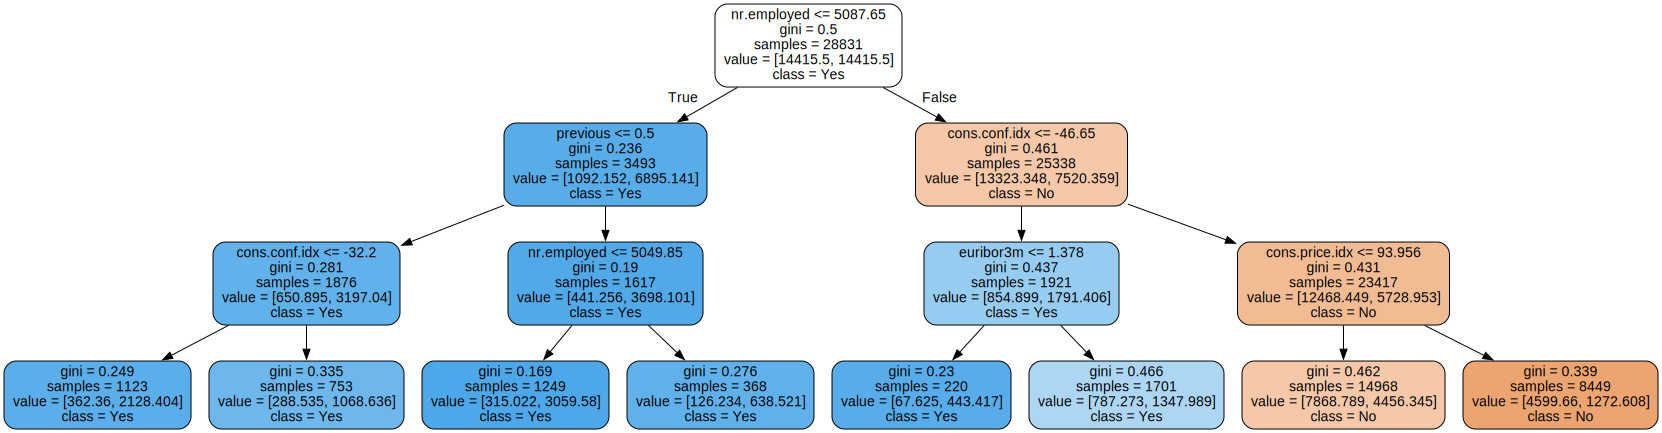

In [7]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

from sklearn.tree import export_graphviz

export_graphviz(
        DT,
        out_file=str(IMAGES_PATH / "iris_tree.dot"),  # path differs in the book
        feature_names=X.columns,
        class_names=['No','Yes'],
        rounded=True,
        filled=True
    )
from graphviz import Source

Source.from_file(IMAGES_PATH / "iris_tree.dot")    

<function matplotlib.pyplot.show(close=None, block=None)>

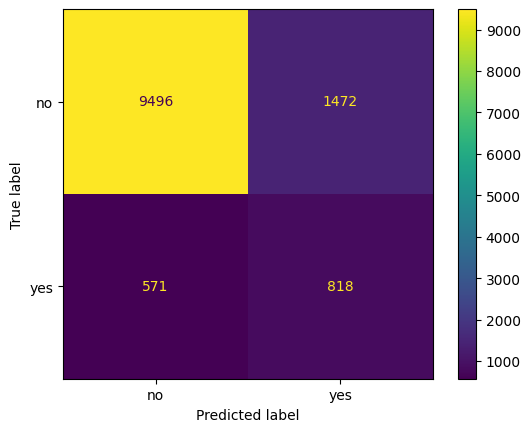

In [8]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred, labels=DT.classes_)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot()
plt.show

In [9]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, y_train)
GaussianNB()
y_pred = NB.predict(X_test)
y_test = np.array(y_test).flatten()

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.93      0.93      0.93     10968
         yes       0.42      0.41      0.42      1389

    accuracy                           0.87     12357
   macro avg       0.67      0.67      0.67     12357
weighted avg       0.87      0.87      0.87     12357



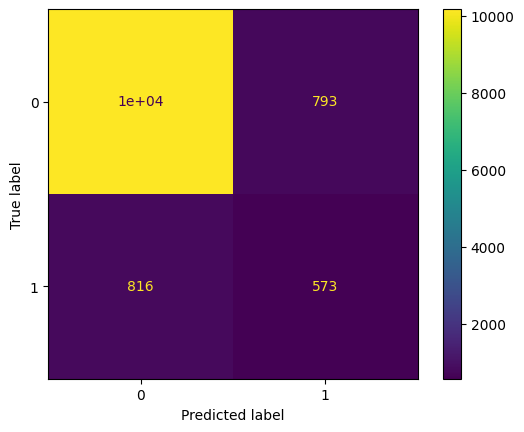

In [10]:
cm2 = sklearn.metrics.confusion_matrix(y_test, y_pred)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()

In [11]:
print("Accuracy for Naive Bayes Classifier: ", np.round(sklearn.metrics.accuracy_score(y_test, y_pred)*100,2), '%')
print("Precision for Naive Bayes Classifier: ", np.round(sklearn.metrics.precision_score(y_test, y_pred,pos_label='yes')*100,2), '%')
print("Recall for Naive Bayes Classifier: ", np.round(sklearn.metrics.recall_score(y_test, y_pred,pos_label='yes')*100,2), '%')
print("F1 score for Naive Bayes Classifier:", np.round(sklearn.metrics.f1_score(y_test, y_pred,pos_label='yes')*100,2), "\n")

Accuracy for Naive Bayes Classifier:  86.98 %
Precision for Naive Bayes Classifier:  41.95 %
Recall for Naive Bayes Classifier:  41.25 %
F1 score for Naive Bayes Classifier: 41.6 

